# Kmeans

Dada uma matriz $\mathbf{X} \in \mathbb{R}^{n \times d}$, cujas linhas são denotadas por $\mathbf{x}_1, \dots, \mathbf{x}_n$, e um inteiro $k$, o objetivo é encontrar $k$ pontos, $\mathbf{c}_1, \dots, \mathbf{c}_k$, de forma que a seguinte quantidade seja minimizada:

\begin{equation}
\sum_{i = 1}^n \min_{1 \le j \le k} ||\mathbf{x}_i - \mathbf{c}_j||_2^2
\end{equation}

O que isso significa no exemplo abaixo?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns; sns.set()
%matplotlib inline

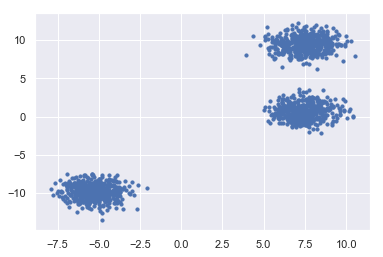

In [2]:
n_samples = 1500
np.random.seed(0)
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.scatter(X[:, 0], X[:, 1], s=10);

### Solução

Esse problema é difícil de ser resolvido de forma exata. Na verdade, não é conhecida (e não se sabe se existe) uma forma eficiente de resolvê-lo.

Na prática, uma heurística simples funciona muito bem. Tal heurística é sumarizada a seguir:

1. "Chute" de alguma forma os $k$ centroides
2. Repita os seguintes passos até que haja convergência
    * Associe cada ponto com o centroide mais próximo
    * Modifique o centroide de cada grupo como sendo a média de cada ponto
    
A biblioteca **scikit-learn**, do Python, traz essa implementação (com uma série de melhorias) já implementada.

In [3]:
from sklearn.cluster import KMeans

In [4]:
# Queremos o kmeans com 3 grupos
kmeans = KMeans(n_clusters = 3) 

# ajustando o modelo
kmeans.fit(X)

# obtendo o identificador de grupo de cada ponto
y_kmeans = kmeans.predict(X)

# cada ponto é mapeado para um número, correspondente ao cluster
# ao qual foi associado
y_kmeans

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)

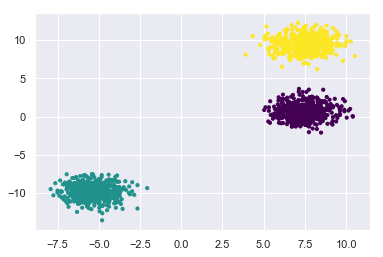

In [5]:
# Com esses números, podemos associar cada grupo a uma cor
_ = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')

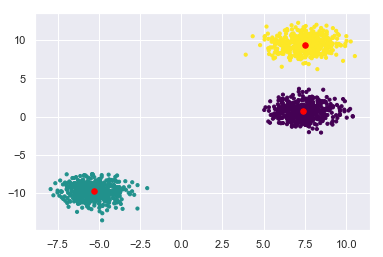

In [6]:
# Podemos ainda, visualizar a localização de cada centroide
centers = kmeans.cluster_centers_
_ = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
_ = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30);

Vamos agregar essa lógica em apenas uma função e ver como o Kmeans se sai em outras situações.

In [7]:
def applyKmeans(X, k):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    _ = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
    _ = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30);

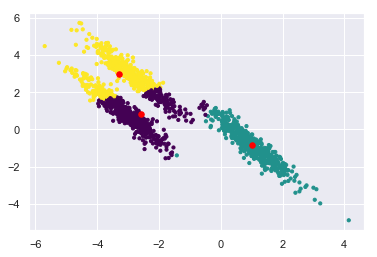

In [8]:
# Grupos elípticos

random_state = 170
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
X = X_aniso

applyKmeans(X, 3)

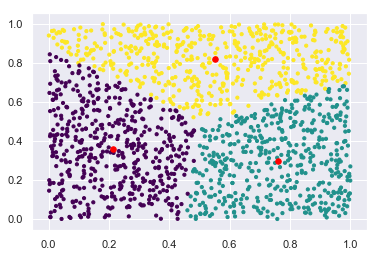

In [9]:
# Ruído

X = np.random.rand(n_samples, 2)
applyKmeans(X, 3)

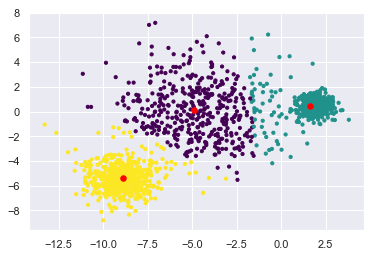

In [10]:
# Variâncias diferentes

X, _ = datasets.make_blobs(n_samples=n_samples,
                           cluster_std=[1.0, 2.5, 0.5],
                           random_state=random_state)
applyKmeans(X, 3)

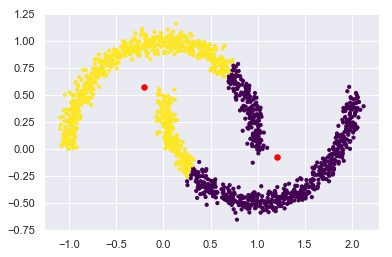

In [11]:
# luas

X, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
applyKmeans(X, 2)

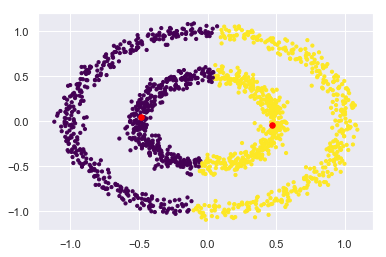

In [12]:
X, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
applyKmeans(X, 2)

### O Kmeans só tem bom desempenho quando os grupos naturais são "circulares", "convexos" e "homogêneos"!

### Como escolher o $k$?

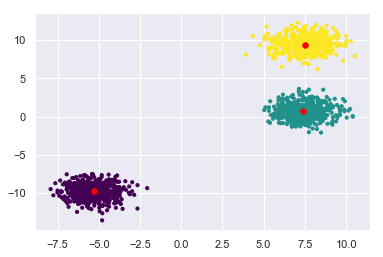

In [10]:
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
applyKmeans(X, 3)

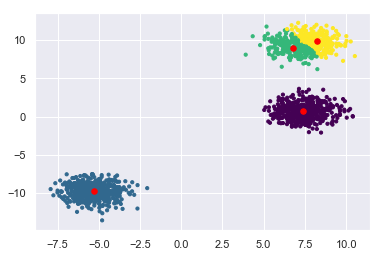

In [14]:
applyKmeans(X, 4)

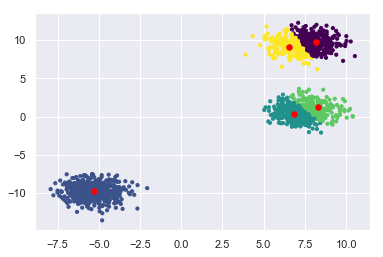

In [15]:
applyKmeans(X, 5)

Repare que o valor da função objetivo sempre descresce quando $k$ cresce. Uma heurística comum para escolher $k$ é variar seu valor e escolher aquele em que o ganho já não seja significativo com relação a seu predecessor.

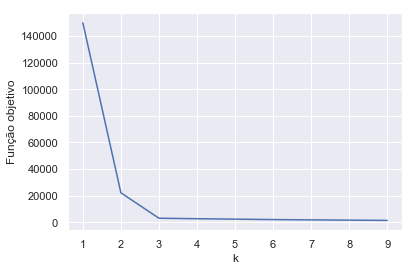

In [11]:
inertia = []
k = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    k.append(i)
_ = plt.plot(k, inertia)
plt.xlabel("k")
_ = plt.ylabel("Função objetivo")